In [1]:
# Función de coste binaria con valores {-1, 1}
# g(z) = "\
# - 1*z_0 - 14*z_1 - 43*z_2 - 14.5*z_3 - 42*z_4 - 28.5*z_5 - 0.5*z_6 \
# + 26.5*z_7 + 24.5*z_8 - 27.5*z_9 - 1*z_10 \
# + 13.5*z_0*z_1 + 13.5*z_0*z_2 - 13.5*z_0*z_3 - 13.5*z_0*z_4 + 13.5*z_1*z_2 \
# + 13.5*z_1*z_3 - 13.5*z_1*z_5 - 13.5*z_1*z_6 + 13.5*z_2*z_4 + 13.5*z_2*z_5 \
# - 13.5*z_2*z_7 - 13.5*z_2*z_8 + 13.5*z_2*z_9 + 13.5*z_3*z_4 - 13.5*z_3*z_5 \
# - 13.5*z_3*z_6 + 13.5*z_4*z_5 - 13.5*z_4*z_7 - 13.5*z_4*z_8 + 13.5*z_4*z_9 \
# + 13.5*z_5*z_6 - 13.5*z_5*z_7 - 13.5*z_5*z_8 + 13.5*z_5*z_9 + 13.5*z_6*z_7 \
# - 13.5*z_6*z_9 - 13.5*z_6*z_10 + 13.5*z_7*z_8 - 27*z_7*z_9 - 13.5*z_7*z_10 \
# - 13.5*z_8*z_9 + 13.5*z_8*z_10 + 13.5*z_9*z_10 + 13.5*x_01**2 + 13.5*z_1**2 \
# + 13.5*z_2**2 + 13.5*z_3**2 + 13.5*z_4**2 + 13.5*z_5**2 + 13.5*z_6**2 \
# + 13.5*z_7**2 + 13.5*z_8**2 + 13.5*z_9**2 + 13.5*x_020**2 + 53.5"

# Grafo
edges = {(0, 1): 2, (0, 2): 1, (0, 3): 5, (1, 2): 2, (1, 3): 3,
         (2, 3): 3, (2, 4): 1, (3, 4): 1, (3, 5): 5, (4, 3): 1, (4, 5): 2}
num_nodes = 6

# Hp = - 1*Z0 - 14*Z1 - 43*Z2 - 14.5*Z3 - 42*Z4 - 28.5*Z5 - 0.5*Z6
#      + 26.5*Z7 + 24.5*Z8 - 27.5*Z9 - 1*Z10
#      + 13.5(
#      + Z0*Z1 + Z0*Z2 - Z0*Z3 - Z0*Z4 + Z1*Z2 + Z1*Z3 - Z1*Z5 - Z1*Z6
#      + Z2*Z4 + Z2*Z5 - Z2*Z7 - Z2*Z8 + Z2*Z9 + Z3*Z4 - Z3*Z5 - Z3*Z6
#      + Z4*Z5 - Z4*Z7 - Z4*Z8 + Z4*Z9 + Z5*Z6 - Z5*Z7 - Z5*Z8 + Z5*Z9
#      + Z6*Z7 - Z6*Z9 - Z6*Z10 + Z7*Z8 - 2*Z7*Z9 - Z7*Z10 - Z8*Z9 + Z8*Z10
#      + Z9*Z10)

# Coeficientes lineales de Hp (-1 * Z0 - 14 * Z1...)
linear_coefs = [-1, -14, -43, -14.5, -42, -28.5, -0.5 , 26.5 , 24.5, -27.5, -1]

# Coeficientes cuadráticos Ej: {(2, 4): 13.5} -> 13.5 * Z2 * Z4
quadra_coefs = {(0, 1):+13.5, (0, 2):+13.5, (0, 3):-13.5, (0, 4):-13.5,
                (1, 2):+13.5, (1, 3):+13.5, (1, 5):-13.5, (1, 6):-13.5,
                (2, 4):+13.5, (2, 5):+13.5, (2, 7):-13.5, (2, 8):-13.5,
                (2, 9):+13.5, (3, 4):+13.5, (3, 5):-13.5, (3, 6):-13.5,
                (4, 5):+13.5, (4, 7):-13.5, (4, 8):-13.5, (4, 9):+13.5,
                (5, 6):+13.5, (5, 7):-13.5, (5, 8):-13.5, (5, 9):+13.5,
                (6, 7):+13.5, (6, 9):-13.5, (6, 10):-13.5, (7, 8):+ 13.5,
                (7, 9):-2*13.5, (7, 10):-13.5,
                (8, 9):-13.5, (8, 10):+13.5, (9, 10):+13.5}

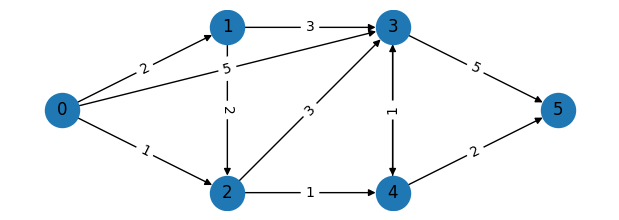

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Imprime un grafo dirigido pesado
# Entrada
#     graph_nodes: Lista de nodos del grafo
#     graph_edges: Diccionario {vértice: peso} donde vértice es (n1, n2)
#     layout:      Para especificar la posición de los nodos
def print_graph(graph_nodes, graph_edges, layout=None):
    G = nx.DiGraph()

    # Nodes
    G.add_nodes_from(graph_nodes)

    # Edges
    for pair, weight in edges.items():
        G.add_edge(pair[0], pair[1], weight=weight)

    # Print graph
    if layout is None:
        layout = nx.spring_layout(G)

    plt.figure(3, figsize=(6, 2))
    nx.draw(G, layout, with_labels=True, node_size=600)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels)
    plt.show()

print_graph(range(num_nodes), edges, layout={0: [-1, 0], 1: [0, 1],
                                             2: [0, -1], 3: [1, 1],
                                             4: [1, -1], 5: [2, 0]})

In [3]:
# Función de coste binaria con valores {0, 1}
cost_function = "\
+ 2*x_01 + 1*x_02 + 5*x_03 + 2*x_12 + 3*x_13 + 3*x_23 + 1*x_24 + 1*x_34 \
+ 5*x_35 + 1*x_43 + 2*x_45 \
+ 27 * (x_01 + x_02 + x_03 - 1)**2 \
+ 27 * (x_35 + x_45 - 1)**2 \
+ 27 * (x_01 - x_12 - x_13)**2 \
+ 27 * (x_02 + x_12 - x_23 - x_24)**2 \
+ 27 * (x_03 + x_13 + x_23 + x_43 - x_34 - x_35)**2 \
+ 27 * (x_24 + x_34 - x_43 - x_45)**2"

# Evalúa una solución concreta según la función de coste para la versión QUBO
# Entrada:
#     - bits: Cadena con los valores de los qubits medidos
#             Orden: q_10 q_9 q_8 q_7 q_6 q_5 q_4 q_3 q_2 q_1 q_0
def eval_cost_function(bits):
    assert len(edges) == len(bits), "Error in cost_function: Length of bits"

    inv_bits = bits[::-1]  # Los qubits están en orden inverso

    param_dict = {}
    # Asignación entre x_ij -> q_n
    # Establecido por el orden de edges. Ej: x_03 -> q_2 (esto es, qubit nº2)
    for n, (i, j) in enumerate(edges):
        param_dict[f"x_{i}{j}"] = int(inv_bits[n])

    return eval(cost_function, param_dict)

In [4]:
from qiskit import QuantumCircuit
def generate_qaoa_circuit(theta):
    assert len(theta) % 2 == 0, "Error in parameters (Beta, Gamma)"

    nqubits = len(edges)  # Tantos qubits como aristas tenga el grafo
    circuit = QuantumCircuit(nqubits)

    layers = int(len(theta) / 2)
    beta = theta[:layers]
    gamma = theta[layers:]

    # |v0>
    for i in range(nqubits):
        circuit.h(i)

    for p in range(layers):
        circuit.barrier()

        # Hp
        for q_idx, coef in enumerate(linear_coefs):
            #circuit.rz(coef * gamma[p], q_idx)
            circuit.rz(coef, q_idx)
        for q_idxs, coef in quadra_coefs.items():
            circuit.rzz(coef * gamma[p], q_idxs[0], q_idxs[1])

        circuit.barrier()

        # Hm
        for q_idx in range(nqubits):
            circuit.rx(beta[p] * 2, q_idx)

    circuit.measure_all()
    return circuit

In [5]:
def compute_expectation(counts):
    media = 0
    len_count = 0
    for bits, count in counts.items():
        cost = eval_cost_function(bits)
        media += cost * count
        len_count += count

    return media/len_count

In [9]:
# Simulador
from qiskit import Aer
from scipy.optimize import minimize

backend = Aer.get_backend('aer_simulator')
shots = 1024

def execute_circuit(theta):
    qc = generate_qaoa_circuit(theta)
    counts = backend.run(qc, shots=shots).result().get_counts()
    return compute_expectation(counts)

p = 1
theta_res = minimize(execute_circuit, [1.0, 1.0] * p, method="COBYLA")
theta_res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 174.6474609375
       x: [ 1.198e+00  9.590e-01]
    nfev: 32
   maxcv: 0.0

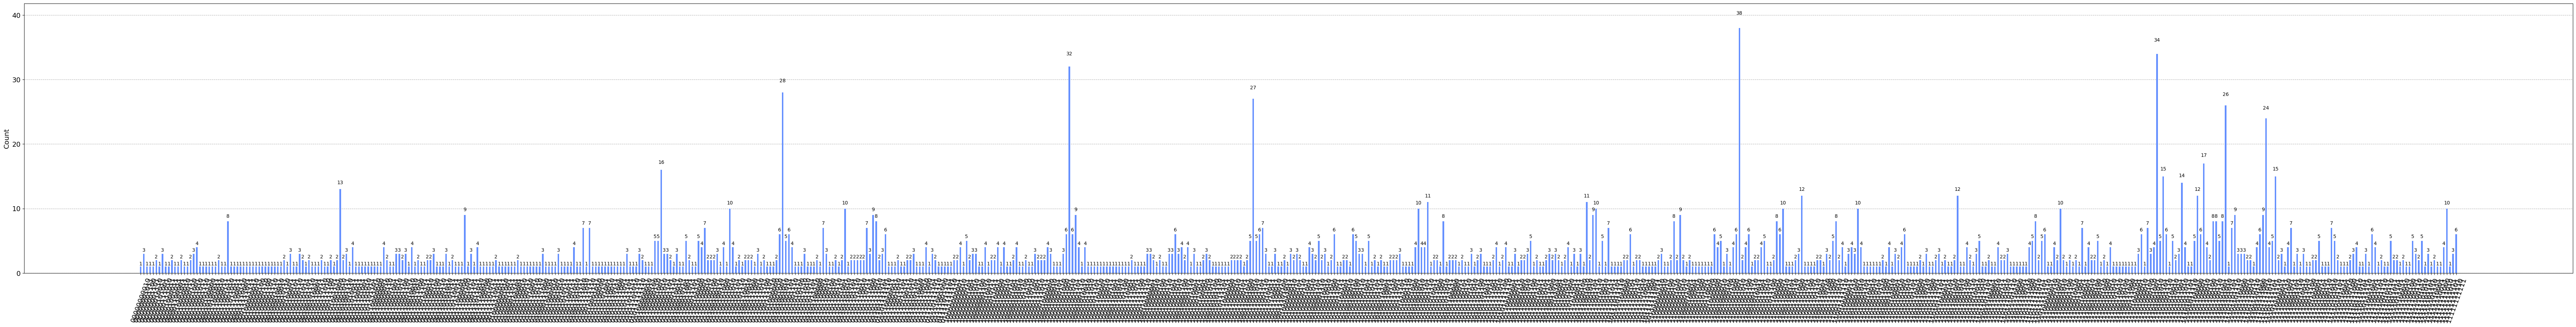

In [10]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
shots = 2048

qc = generate_qaoa_circuit(theta_res.x)
counts = backend.run(qc, shots=shots).result().get_counts()
plot_histogram(counts, figsize=(94, 10))

In [11]:
# Statistics
statistics = {}
for i in range(0, 1000):
    p = 1
    theta_res = minimize(execute_circuit, [1.0, 1.0] * p, method="COBYLA")
    qc = generate_qaoa_circuit(theta_res.x)
    counts = backend.run(qc, shots=shots).result().get_counts()

    path = max(counts, key=counts.get)
    if path not in statistics:
        statistics[path] = 0
    statistics[path] += 1

print(statistics)

{'11101001011': 612, '11001001011': 88, '10010000000': 1, '11001010001': 3, '11101101011': 15, '10011001011': 41, '01010000010': 1, '01000101010': 1, '00010101010': 41, '00110001101': 1, '01011001001': 1, '11011101101': 2, '10101111111': 1, '00010001010': 36, '10011100001': 1, '10001001011': 15, '01101001011': 17, '00011101010': 3, '00110001010': 1, '10111011011': 4, '01100101011': 1, '01010101010': 2, '11101100001': 6, '00000000000': 1, '01100001011': 4, '11101001111': 1, '10111001110': 2, '10010000001': 10, '11100101011': 1, '00001111100': 1, '11101110110': 2, '11101111011': 4, '01011110110': 1, '11110110101': 1, '10101100110': 1, '10110100010': 1, '00010001011': 1, '00100110101': 1, '00110010110': 2, '11100001011': 4, '11101110011': 1, '01100100001': 8, '00000111110': 1, '00011001000': 1, '11100110001': 1, '01001010101': 1, '01110110100': 2, '01101101101': 2, '11010110001': 1, '11001111010': 1, '11011010111': 1, '01100001001': 3, '00010101110': 1, '00000110111': 1, '00011001011': 1,

In [ ]:
# print(counts)
# Res correcto: 01000 0 10001 Ver sentido
# x_02: z_1
# x_24: z_6
# x_45: z_10